<a href="https://colab.research.google.com/github/mkalw/UTS_ML2019_ID12572350_ID12595512/blob/master/Extreme_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import Numpy to perform mathematical computations over nd-arrays
import numpy as np
import pandas as pd

#Import is_string_dtype() method to check if an attribute / feature consists of string values or not
from pandas.api.types import is_string_dtype

#Import XGBoost to train the Gradient Boosting model
from xgboost import XGBRegressor

#Import train_test_split() method from Sk-learn to split the dataframe into training and validation sets
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

#Import Matplotlib for visualisation of Insights
import matplotlib.pyplot as plt

#Import Seaborn for data visualisation
import seaborn as sns
sns.set()

#Set the random seed to a particular state
seed=50
np.random.seed(seed)


In [0]:
#Import data into a data frame
data = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/train.csv')

#Import test data into a data frame
test = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/testdata.csv')
actual_y = pd.read_csv('https://raw.githubusercontent.com/mkalw/UTS_ML2019_ID12572350_ID12595512/master/actual.csv').SalePrice

#Select columns for removal
vars = data.columns

#Remove SalePrice from the dataset
vars=vars.drop('SalePrice')


In [60]:
# Missing data exploration
missing = data.isnull().sum().sort_values(ascending = False)
missing = missing.reset_index()
missing['Percent'] = missing.iloc[:, 1].apply(lambda x: x*100/np.sum(missing.iloc[:, 1]))
missing.columns = ['Attributes', 'Missing', 'Percent']
gtz = missing['Missing'] > 0
missing = missing[gtz]
missing

,Attributes,Missing,Percent
0,PoolQC,1162,20.884256
1,MiscFeature,1127,20.255212
2,Alley,1093,19.644141
3,Fence,953,17.127965
4,FireplaceQu,547,9.831057
5,LotFrontage,210,3.774263
6,GarageCond,61,1.096334
7,GarageType,61,1.096334
8,GarageYrBlt,61,1.096334
9,GarageFinish,61,1.096334


In [0]:
def scatterplot(var):
    dataplots = pd.concat([data['SalePrice'], data[var]], axis=1);
    dataplots.plot.scatter(x=var, y='SalePrice', ylim=(0,900000));


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


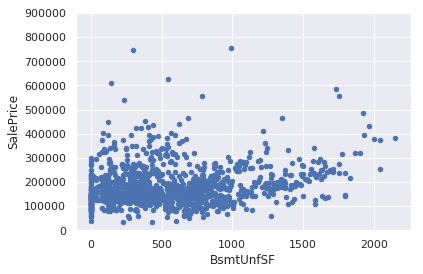

In [62]:
scatterplot('BsmtUnfSF')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


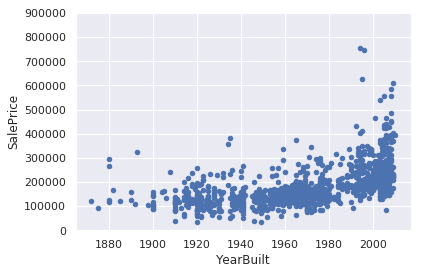

In [63]:
scatterplot('YearBuilt')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


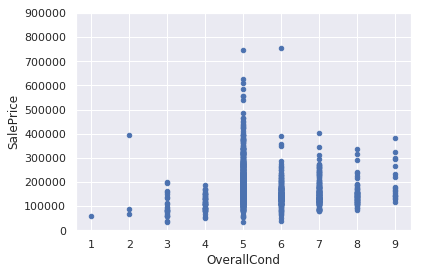

In [64]:
scatterplot('OverallCond')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


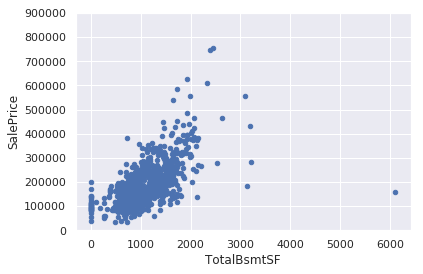

In [65]:
scatterplot('TotalBsmtSF')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


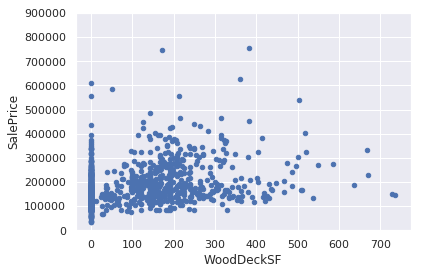

In [66]:
scatterplot('WoodDeckSF')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


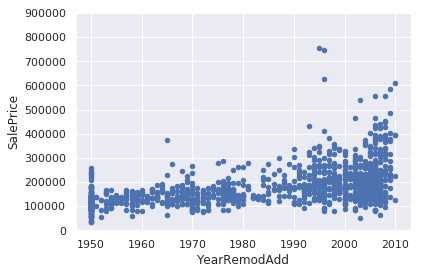

In [67]:
scatterplot('YearRemodAdd')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


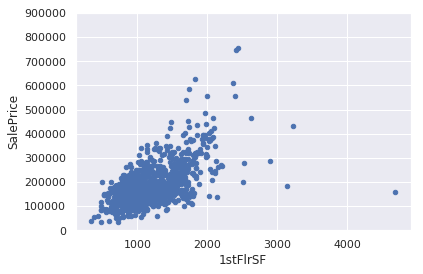

In [68]:
scatterplot('1stFlrSF')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


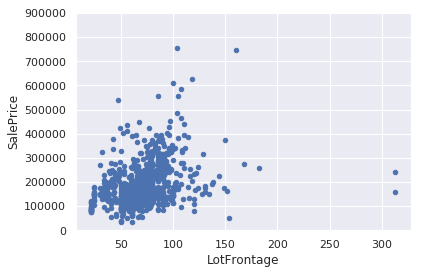

In [69]:
scatterplot('LotFrontage')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


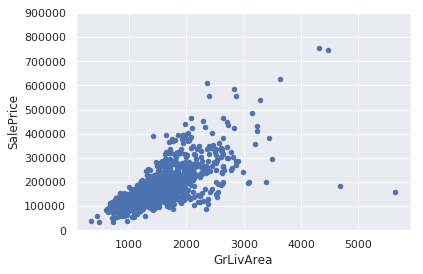

In [70]:
scatterplot('GrLivArea')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


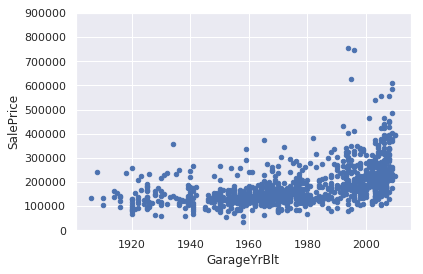

In [71]:
scatterplot('GarageYrBlt')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


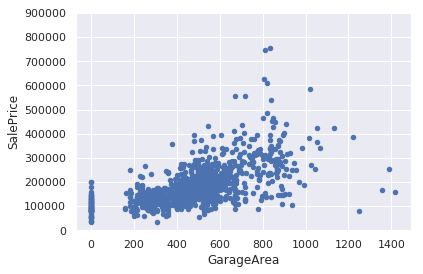

In [72]:
scatterplot('GarageArea')

In [0]:
#Removal of Outlier and Significantly Missing Value Attributes
data=data.drop(data[data['1stFlrSF']>4000].index)
ncols = data.columns.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence']) 

In [74]:
#skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.992674
Kurtosis: 7.278120


In [0]:
#Tranform categorical into numerical data
for col, col_data in data.items():
    if is_string_dtype(col_data):
        data[col] = data[col].astype('category').cat.as_ordered().cat.codes
        test[col] = test[col].astype('category').cat.as_ordered().cat.codes

In [0]:
#Split the data into 80% training and 20% testing
y = data.SalePrice
X = data[vars]

test=test[vars]

##Train Model

In [0]:
params_var = {
    'max_depth': [1, 2, 3, 4, 5],
    'gamma': [0, 0.5, 1],
    'n_estimators': randint(1, 1001), # uniform discrete random distribution
    'learning_rate': uniform(), # gaussian distribution
    'subsample': uniform(), # gaussian distribution
    'colsample_bytree': uniform() # gaussian distribution
}

params_fixed = {
    'silent': 1
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [78]:
#Train the model using XGBRegressor
model = RandomizedSearchCV(
    estimator=XGBRegressor(**params_fixed, seed=seed),
    param_distributions=params_var,
    n_iter=10,
    cv=cv,
    scoring='r2',
    random_state=seed
)
#Fit the model over training data
model.fit(X, y, eval_set=[(test, actual_y)], verbose=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=10...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f40856139b0>,
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_froze

In [79]:
print("Best Score:",model.best_score_)
print("Best Parameters: ",model.best_params_)

Best Score: 0.8615645190389731
Best Parameters:  {'colsample_bytree': 0.16679187616957403, 'gamma': 0, 'learning_rate': 0.05225869110650927, 'max_depth': 3, 'n_estimators': 623, 'subsample': 0.8650736598657645}


In [80]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.16679187616957403, gamma=0,
             importance_type='gain', learning_rate=0.05225869110650927,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
             n_estimators=623, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=50, silent=1, subsample=0.8650736598657645, verbosity=1)

##Test Data

In [0]:
#Predict Sale Price for houses in test data
predicted_y = model.predict(test)

In [82]:
#Extract the actual Sale Price value of test data
print("Actual Price of first 10 instances:\n")
print(actual_y.head(10))
print("\nPredicted Price of first 10 instances:\n")
print(pd.DataFrame(predicted_y).head(10))

Actual Price of first 10 instances:

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

Predicted Price of first 10 instances:

               0
0  203311.468750
1  170324.234375
2  208093.421875
3  167550.078125
4  292283.656250
5  144130.687500
6  291670.437500
7  229057.640625
8  136751.515625
9  115789.195312


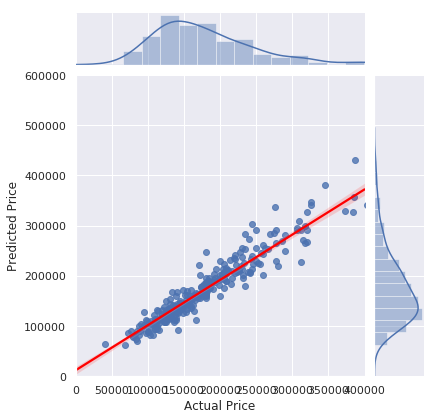

In [83]:
#Plot the actual Price value against predicted Sale Price 
g = sns.jointplot(x= actual_y, y= predicted_y, kind='reg', xlim = (0,400000), ylim=(0,600000),
                  joint_kws={'line_kws':{'color':'red'}})
g.set_axis_labels(xlabel='Actual Price', ylabel='Predicted Price')